# **Homework 2 Practicum**
# Version 1.0 (September 20, 2024)

<font color='blue'> TODO:</font> Trevor Black (tblack20)

Instructions:
This notebook has two parts:

Part 1: Exploring Regularization with Polynomial Regression

In this part, you will implement Polynomial Regression and explore the impact of regularization on the model.

Part 2: Implement Logistic Regression using Newton-Raphson Method

In this part, you will implement Logistic Regression and explore the impact of regularization on the model.

Please answer all questions in this notebook (you will see <font color='blue'>TODO</font> annotations for where to include your answers). At the beginning of each part, we will bullet the expected deliverables for you to complete.

Please <font color='blue'>make a copy of this notebook in your own drive</font> before you make any edits. You can do so through File -> Save a copy in Drive



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

np.random.seed(0)



# **PART I: Exploring Regularization with Polynomial Regression**

Things to do in this part:
1. Implement the MyPolynomialRegression class
2. Answer the two questions

In this section, you will implement a polynomial regression model from scratch and explore how regularization affects its performance. You will work with a synthetic dataset and learn to:

- Implement a custom polynomial regression class: You will complete the MyPolynomialRegression class by filling in the  fit, predict and calculate_error methods.
- Analyze the impact of polynomial degree: You will experiment with different polynomial degrees to see how model complexity affects the bias-variance trade-off and the risk of overfitting. Note that the code for plots  is written and you just need to run it.
- Investigate the role of regularization: You will vary regularization coefficient for L2 regularization of the polynomial regression and observe its effect on model performance, particularly in reducing overfitting. Note that the code for plots  is written and you just need to run it.
- Answer questions: Based on steps 2 and 3  analyze the plots, note the observations and provide explanations for the observed trends.

By the end of this section, you will have a solid grasp of polynomial regression, overfitting, and the role of regularization in building effective machine learning models.

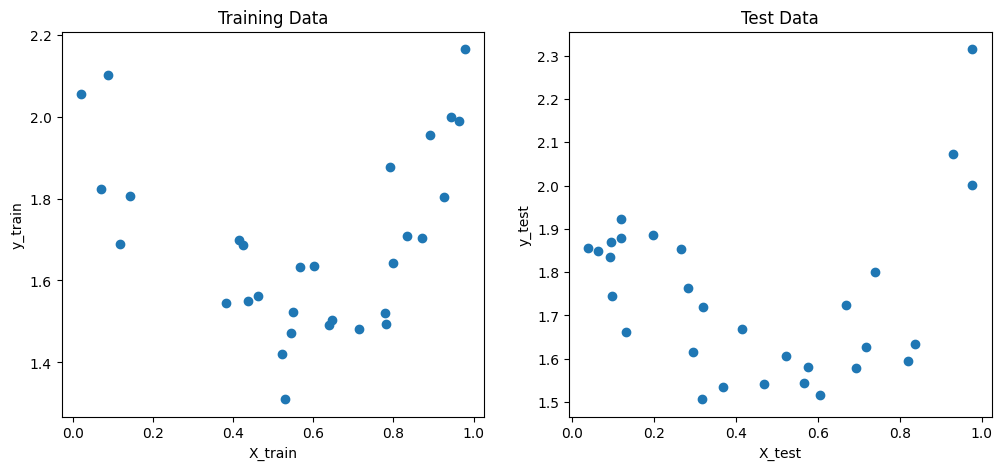

In [4]:
#Run this without modifying
#Generating Synthetic Data for Polynomial Regressoion
def true_fn(X):
    return  0.7* X **4 + 0.25* X ** 3 + 0.75 * X ** 2 - 1.5 * X  + 2


def generate_data(n,mean=0,sd=1):
    X = np.sort(np.random.uniform(0,1,n))
    y = true_fn(X) + (np.random.normal(loc=mean, scale=sd, size=n)*0.1)
    return X,y

X_train,y_train=generate_data(30)
X_test,y_test=generate_data(30)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(X_train,y_train)
ax1.set_xlabel("X_train")
ax1.set_ylabel("y_train")
ax1.set_title("Training Data")

ax2.scatter(X_test,y_test)
ax2.set_xlabel("X_test")
ax2.set_ylabel("y_test")
ax2.set_title("Test Data")
plt.show()

Below you  need to **implement** fit, predict and calculate_error methods of MyPolynomialRegression

In [5]:

class MyPolynomialRegression:
    """
    A class to perform polynomial regression and regularization.
    """
    def __init__(self, degree, reg_coeff):
        """
        Initializes a MyPolynomialRegression object.

        Parameters:
        degree (int): The degree of the polynomial regression.
        reg_coeff (float): The regularization coefficient.

        Attributes:
        self.degree (int): The degree of the polynomial regression.
        self.reg_coeff (float): The regularization coefficient.
        self.weights (list): The weights of the polynomial regression (initialized as None).
        """
        self.degree = degree
        self.reg_coeff = reg_coeff
        self.weights = None

    def _gen_polynomial_features(self,X):
        """
        Generates the polynomial feature matrix from the input data X.

        Parameters:
        X (numpy array): The input data.

        Returns:
        poly_X (numpy array): The polynomial feature matrix.

        Notes:
        - The polynomial feature matrix is generated by raising the input data X to powers from 1 to self.degree.
        - A column of ones is added to the feature matrix to account for the bias term.
        """
        # TODO ...WRITE YOUR CODE HERE...

        if X.ndim == 1:
            X = X.reshape(-1, 1)  # convert to 2D array with shape (n_samples, 1)

        n_samples, n_features = X.shape

        poly_X = np.ones((n_samples, 1)) # extra column for bias term

        for degree in range(1, self.degree + 1):
            for feature in range(n_features):
                feature_column = X[:, feature]
                feature_powered = feature_column ** degree
                feature_reshaped = feature_powered.reshape(-1, 1)
                poly_X = np.hstack((poly_X, feature_reshaped))
                # poly_X[feature][degree] = X[feature] ** (degree)

        return poly_X

    def fit(self, X, y):
        """
        Fits for the given feature matrix and labels.

        Parameters:
        - X: array-like, shape (n_samples,), feature matrix.
        - y: array-like, shape (n_samples,),  target values.
        returns:
        None
        Note: should generate and assign values to self.weights
        """
        # TODO ...WRITE YOUR CODE HERE...
        
        poly_X = self._gen_polynomial_features(X)

        # regularization
        lambda_term = self.reg_coeff * np.eye(poly_X.shape[1])
        lambda_term[0, 0] = 0  # don't regularize the bias term

        # (X~.T @ X~ + lambda)^(-1) @ X~.T @ y <- slide 5.13 and 6.21
        self.weights = np.linalg.inv(poly_X.T @ poly_X + lambda_term) @ poly_X.T @ y
        

    def predict(self,X):
        """
        Predicts target values for the given feature matrix.

        Parameters:
        - X: array-like, shape (n_samples,), feature matrix.

        Returns:
        - y_pred: array-like, shape (n_samples,), predicted target values.
        """
        # TODO ...WRITE YOUR CODE HERE...
        
        poly_X = self._gen_polynomial_features(X)

        if self.weights is None:
            raise TypeError("self.weights is None type. Maybe run fit before calling predict?")

        y_pred = poly_X @ self.weights

        return y_pred


    def calculate_error(self,y_pred,y_true):
        """
        Calculates the mean squared error between predicted and true target values.

        Parameters:
        - y_pred: array-like, shape (n_samples,), predicted target values.
        - y_true: array-like, shape (n_samples,), true target values.

        Returns:
        - mse: float, the mean squared error between y_pred and y_true.
        """
        # TODO ...WRITE YOUR CODE HERE...
        
        errors = y_pred - y_true
        
        mse = np.mean(errors ** 2)
        
        return mse


The provided code tests the polynomial regression implementation. You can add more tests to verify your implementation; these additional tests will not be graded, but are encouraged.

In [6]:

test_model=MyPolynomialRegression(3,0)
test_model.fit(X_train,y_train)
test_preds=test_model.predict(X_test)
test_preds_error=test_model.calculate_error(test_preds,y_test)
print(f"Test error with degree=3 and without regularizations is {test_preds_error:.3f}")

Test error with degree=3 and without regularizations is 0.013


Below code trains polynomial regression models with varying degrees and regularization,
plots the results, and displays the training and testing errors.

The plot_fit function iterates through a list of degrees, fitting both regularized and
non-regularized models for each degree. It then generates plots to visualize
the model fit, the true function, and the training and testing data.

The plots are displayed in a grid, with each row representing a different degree
and each column showing the results with and without regularization.

The function also calculates and displays the training and testing errors for each model.

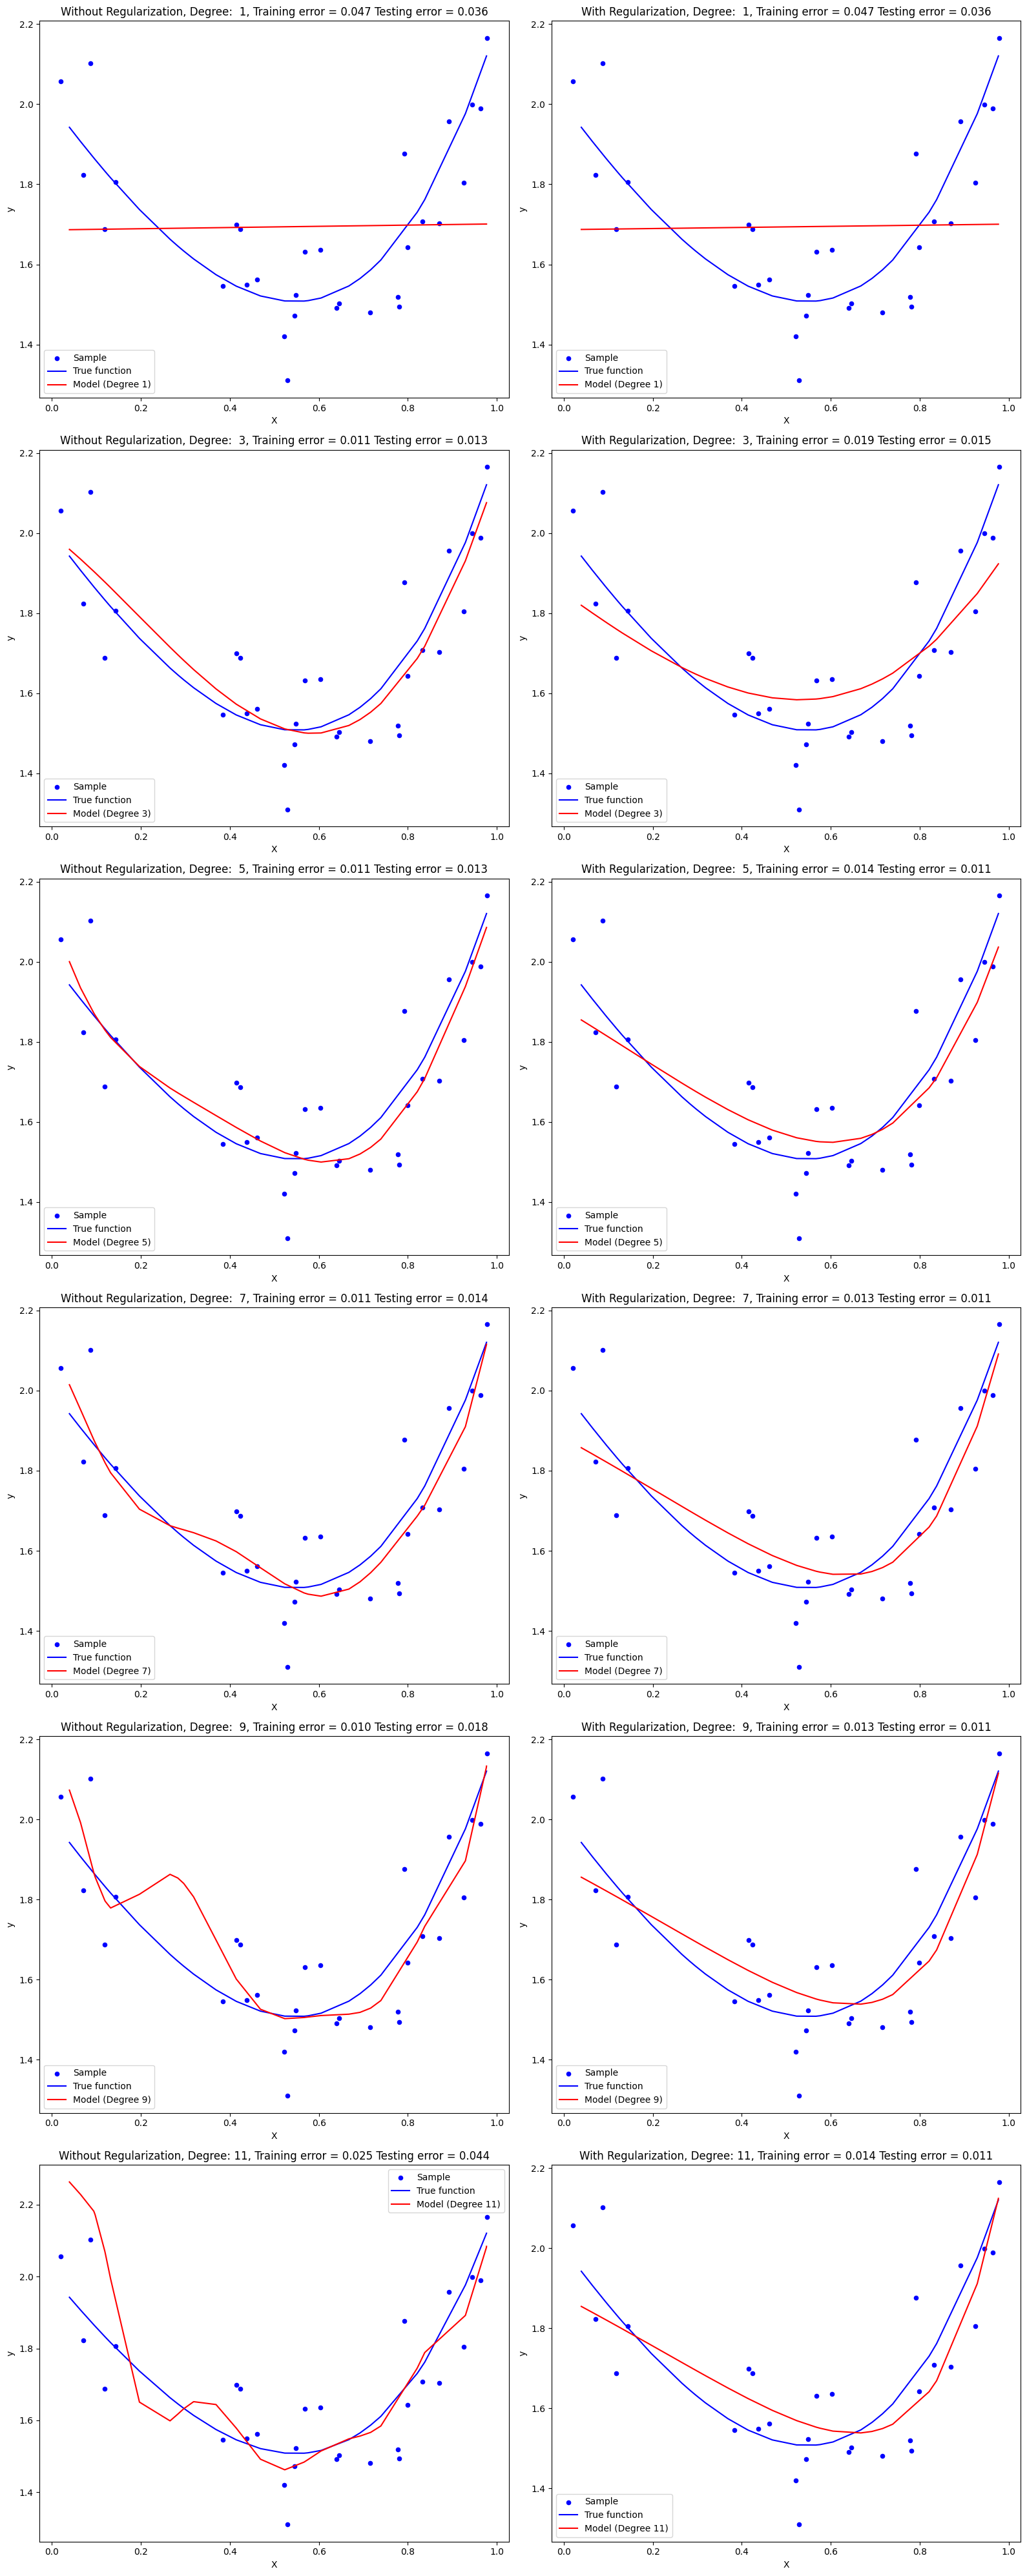

In [7]:
#Run this without modifying after implementing MyPolynomialRegression class above


degrees=[i for i in range(1,13,2)]
train_errors=[]
test_errors=[]
rtrain_errors=[]
rtest_errors=[]
def plot_fit():
    fig, axs = plt.subplots(len(degrees),2,figsize=(16, 40))
    for i,degree in enumerate(degrees):
        #Train, predict and calculate error without regularization
        model=MyPolynomialRegression(degree,0)
        model.fit(X_train,y_train)
        y_train_preds=model.predict(X_train)
        y_test_preds=model.predict(X_test)
        training_error=model.calculate_error(y_train_preds,y_train)
        testing_error=model.calculate_error(y_test_preds,y_test)
        train_errors.append(training_error)
        test_errors.append(testing_error)

        #Train, predict and calculate error with regularization
        rmodel=MyPolynomialRegression(degree,0.2)
        rmodel.fit(X_train,y_train)
        ry_train_preds=rmodel.predict(X_train)
        ry_test_preds=rmodel.predict(X_test)
        rtraining_error=rmodel.calculate_error(ry_train_preds,y_train)
        rtesting_error=rmodel.calculate_error(ry_test_preds,y_test)
        rtrain_errors.append(rtraining_error)
        rtest_errors.append(rtesting_error)


        #plot them side by side
        #plot non regularized
        axs[i,0].scatter(X_train, y_train,color='blue',s=20 ,label='Sample')
        axs[i,0].plot(X_test, true_fn(X_test),color='blue' ,label='True function')
        axs[i,0].plot(X_test, y_test_preds,color='red',label=f'Model (Degree {degree})')
        axs[i,0].set_xlabel('X')
        axs[i,0].set_ylabel('y')
        axs[i,0].set_title(f"Without Regularization, Degree: {degree:2d}, Training error = {training_error:.3f} Testing error = {testing_error:.3f}")
        axs[i,0].legend()

        #plot regularized
        axs[i,1].scatter(X_train, y_train,color='blue',s=20 ,label='Sample')
        axs[i,1].plot(X_test, true_fn(X_test),color='blue' ,label='True function')
        axs[i,1].plot(X_test, ry_test_preds,color='red',label=f'Model (Degree {degree})')
        axs[i,1].set_xlabel('X')
        axs[i,1].set_ylabel('y')
        axs[i,1].set_title(f"With Regularization, Degree: {degree:2d}, Training error = {rtraining_error:.3f} Testing error = {rtesting_error:.3f}")
        axs[i,1].legend()
    fig.tight_layout()
    plt.show()


plot_fit()

# **Question1: What do you observe from the plots? Discuss the reasons for the trends in your obeservations?**



<font color='blue'>
    TODO: replace this cell with your answer
</font>

With a degree of only 1, the model is simply a linear function and therefore does not have enough complexity to accurately fit the true function. As the degree increases to 3 and 5, the model has the flexibility to better fit the true function, thus lowering the training and testing errors substantially. As it continues further to degrees of 7 and 9, the training error continues to decrease while the testing error increases due to over-fitting. It has too manny parameters and uses them to try and model exactly the training data points instead of the general function the data follows. Finally, at degree 11, the training and testing errors both increase substantially because it has too many parameters to tweak to try and fit the curve with limited data.

This does not happen with regularization, however, as it prevents the model from over-fitting.

Below we explore the impact of different regularization coefficients on polynomial regression models.

The explore_reg_coeffs function iterates through a range of polynomial degrees and regularization coefficients.
For each combination, it trains a polynomial regression model, calculates the training and testing errors, and generates visualizations.



For reg coeff of 0.00 training error is 0.011 testing error is0.013
For reg coeff of 0.02 training error is 0.012 testing error is0.013
For reg coeff of 0.05 training error is 0.013 testing error is0.012
For reg coeff of 0.10 training error is 0.015 testing error is0.013
For reg coeff of 0.15 training error is 0.017 testing error is0.014
For reg coeff of 0.20 training error is 0.019 testing error is0.015
For reg coeff of 0.25 training error is 0.021 testing error is0.017
For reg coeff of 0.30 training error is 0.022 testing error is0.018


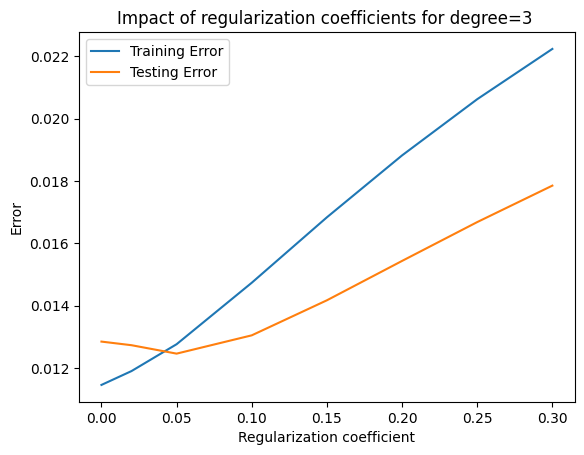

For reg coeff of 0.00 training error is 0.011 testing error is0.013
For reg coeff of 0.02 training error is 0.011 testing error is0.012
For reg coeff of 0.05 training error is 0.012 testing error is0.012
For reg coeff of 0.10 training error is 0.013 testing error is0.012
For reg coeff of 0.15 training error is 0.014 testing error is0.012
For reg coeff of 0.20 training error is 0.015 testing error is0.012
For reg coeff of 0.25 training error is 0.016 testing error is0.013
For reg coeff of 0.30 training error is 0.017 testing error is0.014


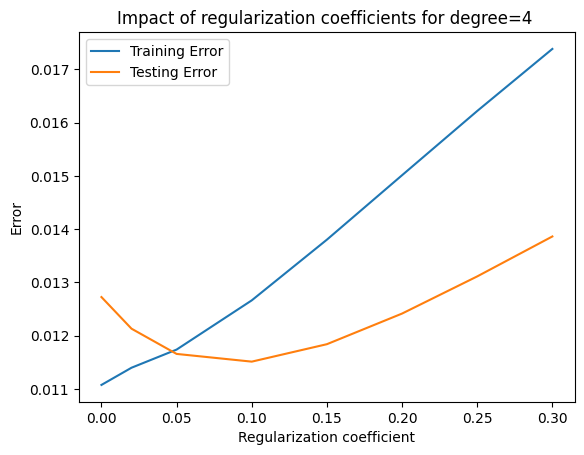

For reg coeff of 0.00 training error is 0.011 testing error is0.013
For reg coeff of 0.02 training error is 0.011 testing error is0.012
For reg coeff of 0.05 training error is 0.012 testing error is0.011
For reg coeff of 0.10 training error is 0.012 testing error is0.011
For reg coeff of 0.15 training error is 0.013 testing error is0.011
For reg coeff of 0.20 training error is 0.014 testing error is0.011
For reg coeff of 0.25 training error is 0.014 testing error is0.012
For reg coeff of 0.30 training error is 0.015 testing error is0.012


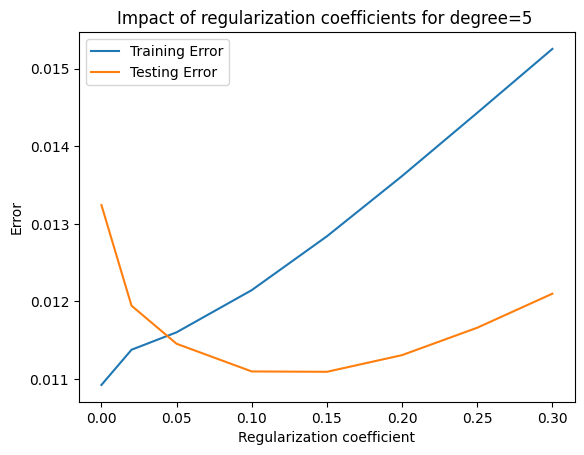

For reg coeff of 0.00 training error is 0.011 testing error is0.012
For reg coeff of 0.02 training error is 0.011 testing error is0.012
For reg coeff of 0.05 training error is 0.012 testing error is0.011
For reg coeff of 0.10 training error is 0.012 testing error is0.011
For reg coeff of 0.15 training error is 0.013 testing error is0.011
For reg coeff of 0.20 training error is 0.013 testing error is0.011
For reg coeff of 0.25 training error is 0.014 testing error is0.011
For reg coeff of 0.30 training error is 0.014 testing error is0.011


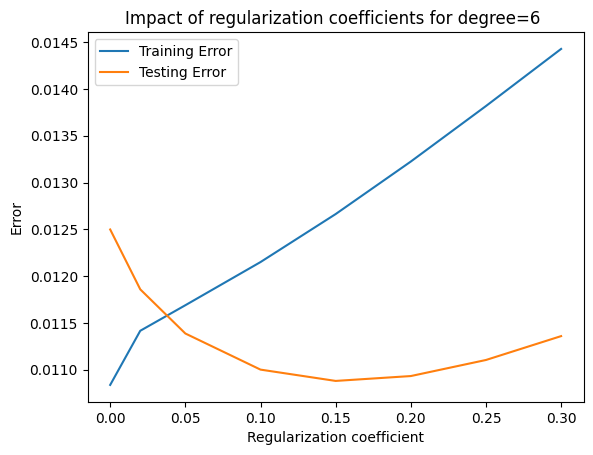

For reg coeff of 0.00 training error is 0.011 testing error is0.014
For reg coeff of 0.02 training error is 0.011 testing error is0.012
For reg coeff of 0.05 training error is 0.012 testing error is0.011
For reg coeff of 0.10 training error is 0.012 testing error is0.011
For reg coeff of 0.15 training error is 0.013 testing error is0.011
For reg coeff of 0.20 training error is 0.013 testing error is0.011
For reg coeff of 0.25 training error is 0.014 testing error is0.011
For reg coeff of 0.30 training error is 0.014 testing error is0.011


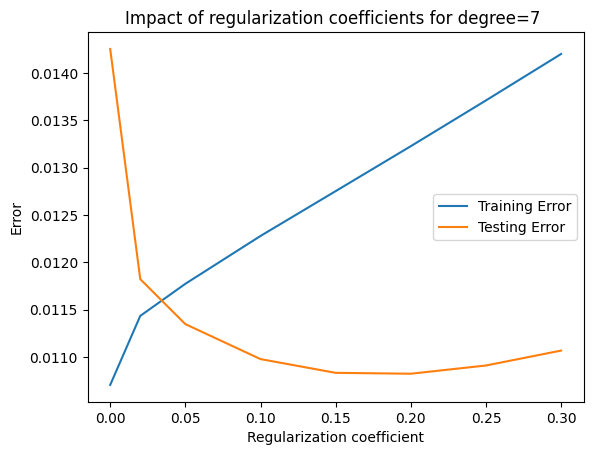

In [8]:
#Run without modifying but only after implementing both MyPolynomialRegression class and the above code
def explore_reg_coeffs():
    for degree in degrees:
        reg_test_errors=[]
        reg_train_errors=[]
        for i,reg_coeff in enumerate(reg_coeffs):
            #Vary degrees with regularization
            rmodel=MyPolynomialRegression(degree,reg_coeff)
            rmodel.fit(X_train,y_train)
            ry_train_preds=rmodel.predict(X_train)
            ry_test_preds=rmodel.predict(X_test)
            rtraining_error=rmodel.calculate_error(ry_train_preds,y_train)
            rtesting_error=rmodel.calculate_error(ry_test_preds,y_test)
            reg_train_errors.append(rtraining_error)
            reg_test_errors.append(rtesting_error)
            print(f"For reg coeff of {reg_coeff:.2f} training error is {rtraining_error:.3f} testing error is{rtesting_error:.3f}")
        plt.plot(reg_coeffs,reg_train_errors,label=f'Training Error')
        plt.plot(reg_coeffs,reg_test_errors,label=f'Testing Error')
        plt.xlabel('Regularization coefficient')
        plt.ylabel('Error')
        plt.title(f"Impact of regularization coefficients for degree={degree} ")
        plt.legend()
        plt.show()





reg_coeffs=[0, 0.02,0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
degrees=[3,4,5,6,7]
explore_reg_coeffs()




# **Question 2: What do you observe from the plots? Discuss the reasons for the trends in your obeservations?**



<font color='blue'>
    TODO: replace this cell with your answer
</font>

The regularization coefficient had a linear impact on the training error, becoming less extreme as the degree increased. For the testing error, the regularization tended to decrease the error for smaller values, but increase the error as the coefficient increased. However, for greater degrees of the model, a greater regularization coefficient lowered the testing error more.

This is because the regularization coefficient counters over-fitting. With low degree models, they did not overfit, so regularization made the model too 'rigid,' or 'biased.' For greater degree models, it *would* over-fit, so making the fitting more rigid, or less subject to variance in the data kept the over-fitting at bay.

The testing error still increased for high regularization coefficients, however, because it can still become too biased for the given dataset and not pick up on the variability in the data enough.  

# **PART II: Implement Logistic Regression with Newton Raphson Method**

**Things to do in this part**:

1. Implement MyLogisticRegression
2. Answer Question 3

In this section, you will implement a Logistic Regression model from scratch using the Newton-Raphson method for optimization. Logistic regression is a powerful technique for binary classification problems. The Newton-Raphson method is an iterative optimization algorithm used to find the best-fitting parameters for the model.

You will work with the Breast Cancer Wisconsin (Diagnostic) dataset and learn to:

1. Implement core components of the logistic regression class: You will complete the MyLogisticRegression class by filling in the fit method.
2. Train and evaluate the model: You will train the logistic regression model on the training data and evaluate its performance.
3. Visualize the convergence of model parameters: You will generate plots to track the convergence of the model's coefficients during the training process.Note that the code is provided.
4. Answer questions: You will analyze the plots and provide explanations for the observed trends.

By the end of this section, you will have a strong understanding of logistic regression, the Newton-Raphson optimization method, and the role of regularization in preventing overfitting in classification problems.

In [9]:
#Run without modifying, loading dataset for logistic regression
data = load_breast_cancer()
X_lr = data.data
y_lr = data.target

# Split dataset into training and testing sets
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)
print(f"X_lr_train={X_lr_train.shape}")
print(f"X_lr_test={X_lr_test.shape}")




X_lr_train=(455, 30)
X_lr_test=(114, 30)


Complete the implementation of fit method in MyLogisticRegression class

In [274]:

class MyLogisticRegression:
    def __init__(self, max_iters=10, tol=1e-8, reg_term=0):
        """
        Initialize the logistic regression model.

        Parameters:
        max_iters (int): Maximum number of iterations for convergence.
        tol (float): Convergence tolerance.
        reg_term (float): Regularization term.
        """
        self.max_iters = max_iters
        self.tol = tol
        self.reg_term = reg_term
        self.weights = None
        self.weights_history=[]

    def sigmoid(self, x):
        """
        Compute the sigmoid function.

        Parameters:
        x (numpy array): Input array.

        Returns:
        numpy array: Sigmoid output.
        """
        return 1 / (1 + np.exp(-x))


    def _newton_step(self,old_weights,X,y):
        """
        Perform a single Newton-Raphson step.

        Parameters:
        X (numpy array): Feature matrix.
        y (numpy array): Target values.

        Returns:
        numpy array: Updated weights
        """
        # TODO ...WRITE YOUR CODE HERE...

        n_features = X.shape[1]

        # probabilities using the sigmoid function p(y=1|X,weights) slide 5.18
        probabilities = self.sigmoid(np.dot(X, old_weights))

        # hessian = X @ X.T * p(y=1) * p(y=0) 
        prob_coeffs = probabilities * (1 - probabilities)
        hessian = X.T @ np.diag(prob_coeffs) @ X

        # gradient = x_i dot (y - probabilities) slide 5.28
        gradient = np.ones((n_features,))
        for i in range(n_features):
            g_lambda_term = self.reg_term * old_weights[i] # regularization
            gradient[i] = -np.dot(X[:,i], (y - probabilities)) + g_lambda_term # not sure why negative worked better

        # regularization
        h_lambda_term = self.reg_term * np.eye(n_features)

        # new = old - hessian.inv @ gradient slide 5.27
        new_weights = old_weights - np.linalg.inv(hessian + h_lambda_term) @ gradient

        return new_weights
         
        

    def fit(self, X, y):
        """
        Train the logistic regression model.

        Parameters:
        X (numpy array): Feature matrix.
        y (numpy array): Target values.
        """
        # Add intercept term
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.weights = np.zeros(X.shape[1])
        self.weights_history.append(self.weights.copy())
        converged = False
        iteration = 0

        while not converged and iteration < self.max_iters:
            iteration += 1
            old_weights=self.weights.copy()
            #Update weights
            self.weights=self._newton_step(old_weights,X,y)
            #Storing weights for plotting
            self.weights_history.append(self.weights.copy())
            # Check for convergence
            delta=self.weights-old_weights
            if np.linalg.norm(delta) < self.tol:
                converged = True
                print(f'Converged after {iteration} iterations.')





    def predict(self, X):
        """
        Make predictions using the trained model.

        Parameters:
        X (numpy array): Feature matrix.

        Returns:
        numpy array: Predictions
        """
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        probabilities = self.sigmoid(np.dot(X, self.weights))
        return np.where(probabilities >= 0.5, 1, 0)

    def test_model(self, X, y):
        """
        Evaluate the model's accuracy.

        Parameters:
        X (numpy array): Feature matrix.
        y (numpy array): Target values.

        Returns:
        float: Accuracy percentage.
        """

        prob = self.predict(X)
        count=0
        for yp,yt in zip(prob,y):
            if yp==yt:
                count+=1
        return count/len(y)

    def plot_convergence(self):
         """
          Plots the convergence of the model's coefficients (beta values) over iterations.

          This function visualizes how the beta values change during the training process,
          helping to understand the convergence behavior of the Newton-Raphson optimization.

          It creates a line plot with iteration number on the x-axis and beta values on the y-axis.
          Each beta coefficient is represented by a separate line, allowing for easy comparison
          of their convergence patterns.

          The plot includes labels for the axes, a title, and a legend to identify each beta coefficient.
          """

         y_vals=np.array(self.weights_history)


         for i in range(y_vals.shape[1]):
            plt.plot(range(len(self.weights_history)), y_vals[:, i], label=f'Beta {i}')

         plt.xlabel('Iteration')
         plt.ylabel('Beta Values')
         plt.title('Convergence of Coefficients')
         plt.legend(
            loc='upper left',
            bbox_to_anchor=(1, 1),
            ncol=5,
            title='Legend',
            fontsize='small',
            title_fontsize='medium'
         )
         plt.show()

We provide the code to test the logistic regression model on the tennis dataset. You can add more tests to verify your implementation; these additional tests will not be graded, but are encouraged.

In [260]:
lr_test_model=MyLogisticRegression(max_iters=10, tol=1e-8, reg_term=0)
lr_test_model.fit(X_lr_train,y_lr_train)
test_accuracy = lr_test_model.test_model(X_lr_test,y_lr_test)
print(f"Accuracy is {test_accuracy:.3f}")

Accuracy is 0.904


Below we provide code to train and evaluate logistic regression models with and without regularization.

After training  with regularizaton= 0, train accuracy is 1.000 and  test accuracy is 0.904


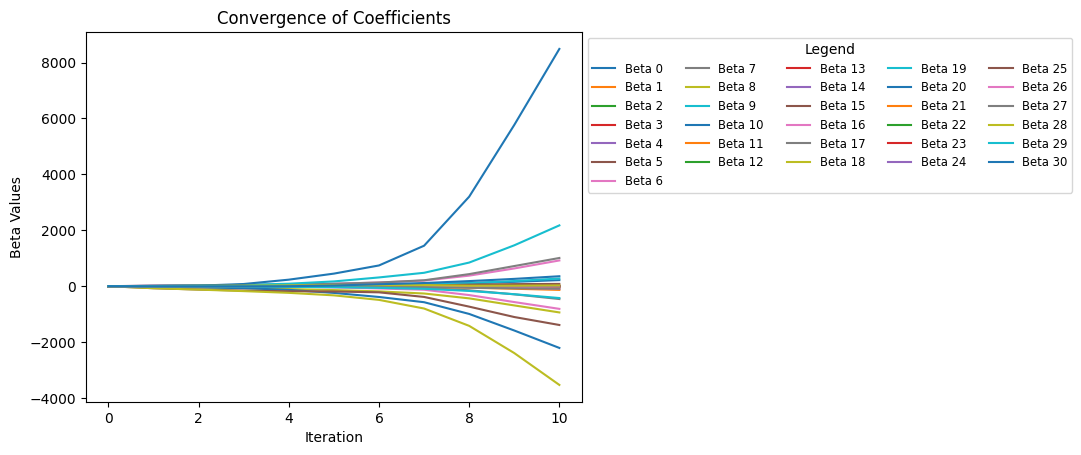

Converged after 10 iterations.
After training  with regularizaton= 1, train accuracy is 0.958 and  test accuracy is 0.956


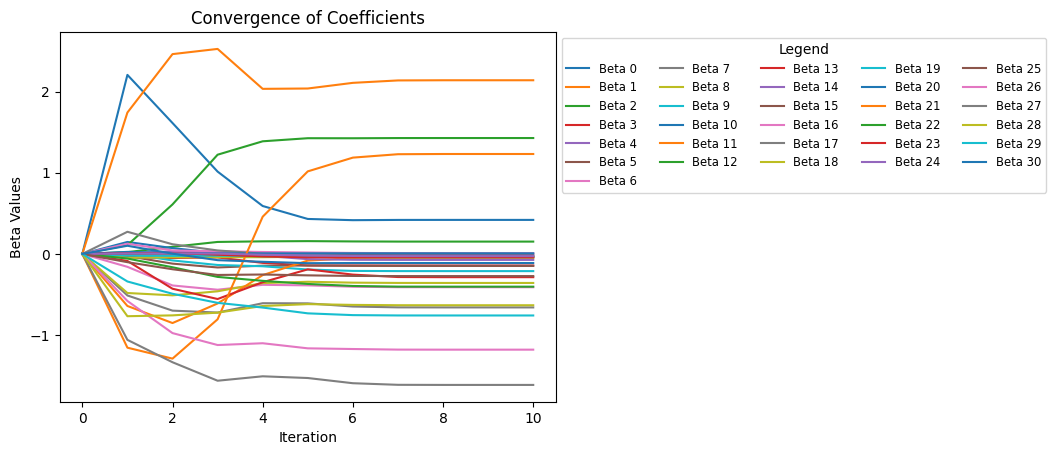

In [275]:
# Run without modifying
for reg_term in [0,1]:
  lr_model = MyLogisticRegression(max_iters=10, tol=1e-8, reg_term=reg_term)

  # Train the model
  lr_model.fit(X_lr_train, y_lr_train)

  # Evaluate the model's accuracy
  train_accuracy=lr_model.test_model(X_lr_train,y_lr_train)
  test_accuracy = lr_model.test_model(X_lr_test,y_lr_test)
  print(f'After training  with regularizaton= {reg_term}, train accuracy is {train_accuracy:.3f} and  test accuracy is {test_accuracy:.3f}')
  lr_model.plot_convergence()

# **Question 3: What do you observe from the plots? Discuss the reasons for the trends in your obeservations?**



<font color='blue'>
    TODO: replace this cell with your answer
</font>

Without regularization, the weights never converge to any values. This means they grow to incredibly large values that still fit the training data. This has the effect of worsening its fit to the testing data. With regularization, the weights converge to values, as the regularization discourages large weights.

It discourages large weights by adding the regularization term to the gradient and hessian. By doing this, it adds penalties to the loss function for larger weights, making sure the model is not over reliant on a few key features.


## Feedback

The first section I got stuck because I forgot to implement the regularization term, but other than that it wasn't too bad.

The second part I got lost for a while on adding the regularization to the Newton-Raphson step, so it took me a while longer.

All in all, I think I spent about 8 or so hours on the practicum, but that's a very rough estimate.

## Submit
Great work! You're all done.

Make sure to submit this Python notebook. See the homework writeup for directions.